In [1]:
import numpy as np
import matplotlib.pyplot as plt

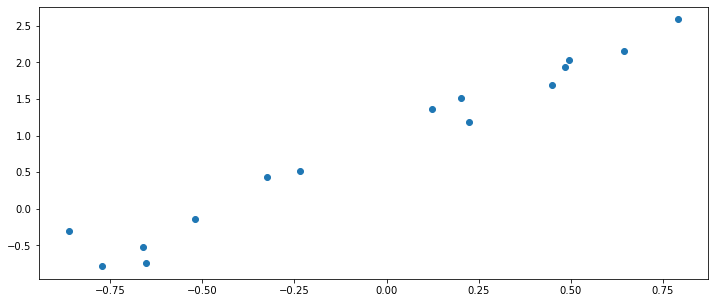

In [17]:
# generate and plot a toy dataset
m = 15
x = -1 + 2*np.random.rand(m)
y = 2*x+1 + 0.25*np.random.randn(m)

plt.figure(figsize=(12,5))
plt.plot(x,y,'o')

In [18]:
# split data into training and test sets
x_train,y_train = x[:10],y[:10]
x_test,y_test = x[10:],y[10:]
m_train = len(y_train)
m_test = len(y_test)

Training Set Mean Squared Error: 5.941317440964341e-16
Test Set Mean Squared Error: 24419.558521411927


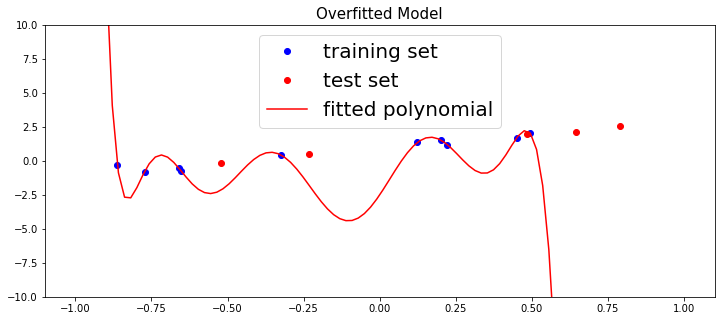

In [19]:
# overfitted polynomial example
degree = 10

# build X matrices
X_train = np.ones((m_train,degree+1))
X_test = np.ones((m_test,degree+1))
for i in range(degree):
    X_train[:,i+1]=x_train**(i+1)
    X_test[:,i+1]=x_test**(i+1)
    
    
# fit a polynomial (to the training set)
theta = np.linalg.solve(X_train.T.dot(X_train),X_train.T.dot(y_train))

# plot data
plt.figure(figsize=(12,5))
plt.plot(x_train,y_train,'bo', label = 'training set')
plt.plot(x_test,y_test,'ro', label = 'test set')

# plot the fitted polynomial
m_plot = 100
x_plot = np.linspace(-1,1,m_plot) 
X_plot = np.ones((m_plot,degree+1))
for i in range(degree):
    X_plot[:,i+1]=x_plot**(i+1)
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r-', label='fitted polynomial')

plt.legend(fontsize=20)
plt.title('Overfitted Model',fontsize = 15)
plt.ylim(-10,10)

# MSEs
MSE_train = np.linalg.norm(y_train-X_train@theta)**2/len(x_train)
MSE_test = np.linalg.norm(y_test-X_test@theta)**2/len(x_train)
print('Training Set Mean Squared Error: '+str(MSE_train))
print('Test Set Mean Squared Error: '+str(MSE_test))

In [20]:
# function from the previous class
def linregression_GD(X,y,learning_rate, n_epochs = 100, return_MSE=False, test_data = None):
    '''
    linear regression with Gradient Descent
    
    INPUT: 
    - the matrix X
    - the vector y
    - learning rate
    - epochs: number of Gradient Descent iterations (defualt 100)
    - return_MSE: if True, it returs the mse at each iteration (default False)
    - test_data: data (X_test,y_test) for monitoring overfitting
    
    OUTPUT:
    - the vector theta
    - MSE: error at each iteration
    '''
    m,n = X.shape # size of data set, number of features
    theta = np.random.randn(n) # random initialization
    
    # initialize MSE vector (only if retur_MSE = True)
    if return_MSE:
        MSE = np.zeros(n_epochs)
    
    # initialize MSE_test vector (only if test_data not None)
    if test_data:
        X_test,y_test = test_data
        m_test = len(y_test)
        MSE_test = np.zeros(n_epochs)
    
    # gradient descent iterations
    for epoch in range(n_epochs):
        gradient = (2/m)*X.T.dot(X.dot(theta)-y) # gradient of the mse function
        theta = theta - learning_rate*gradient # update the vector theta
        # compute mean squared error (only if return_MSE = True)
        if return_MSE:
            MSE[epoch] = np.linalg.norm(y-X.dot(theta))**2/m
        # compute mean squared error on test set (only if test_data is not None)
        if test_data:
            MSE_test[epoch] = np.linalg.norm(y_test-X_test.dot(theta))**2/m_test
    
    results = {}
    results['coeff'] = theta
    if return_MSE:
        results['error'] = MSE
    if test_data:
        results['test_error'] = MSE_test
    return results

In [22]:
# Gradient Descent
lr = 0.5 # learning rate
epochs = 1000 # number of gradient descent iterations
results = linregression_GD(X_train,
                                              y_train, 
                                              n_epochs = epochs, 
                                              learning_rate = lr, 
                                              return_MSE = True,
                                              test_data = (X_test,y_test))

In [23]:
theta = results['coeff']
MSE_train = results['error']
MSE_test = results['test_error']

Text(0.5, 1.0, 'Mean Squared Error')

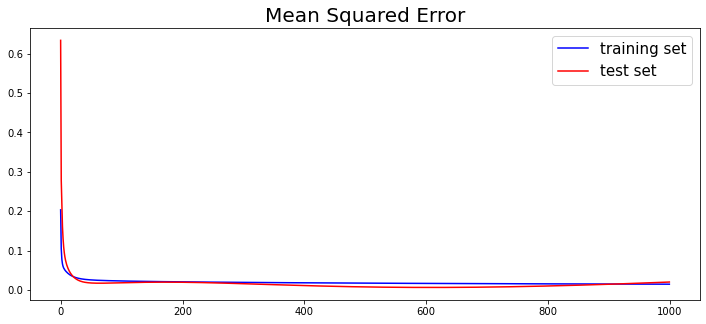

In [24]:
plt.figure(figsize=(12,5))
plt.plot(MSE_train,'b', label = 'training set')
plt.plot(MSE_test, 'r', label = 'test set')
plt.legend(fontsize=15)
plt.title('Mean Squared Error', fontsize=20)